## Haris Sumra
## Housing Violation Dataset
## 10/20/2019

### In this Project:
* Usin pandas to ingest and select some data from my final project dataset
* Clean up the data; drop any unnecessary columns along with renaming the columns. 
* Data was collected from (https://data.cityofnewyork.us/resource/wvxf-dwi5.csv)
* Using matplotlib, pandas and seaborn to visualize data, and compare how data could correlate visually 

### Importing all the libraries that I will be using in this module

In [185]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Extracting the data from the website listed below, only using up to 5000 rows for now.

In [186]:
#Get the data
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$limit=5000")
df.shape

(5000, 40)

In [169]:
df.head(5)

,violationid,buildingid,registrationid,boroid,boro,housenumber,lowhousenumber,highhousenumber,streetname,streetcode,...,novtype,violationstatus,latitude,longitude,communityboard,councildistrict,censustract,bin,bbl,nta
0,10000009,265980,301467,3,BROOKLYN,355,355,355,EAST 48 STREET,36930,...,Original,Close,40.653217,-73.932480,17,41,870,3102071.0,3.046740e+09,East Flatbush-Farragut
1,10000011,73852,226626,2,BRONX,1123,1123,1123,EAST TREMONT AVENUE,29620,...,Original,Close,40.839954,-73.876599,6,15,220,2042428.0,2.040040e+09,East Tremont
2,10000012,80102,211704,2,BRONX,751,751,751,GERARD AVENUE,35020,...,Original,Close,40.824692,-73.926605,4,8,63,2002971.0,2.024820e+09,West Concourse
3,10000014,268639,350942,3,BROOKLYN,54,54,54,EAST 52 STREET,37080,...,Original,Close,40.659731,-73.929295,17,41,878,3099672.0,3.046050e+09,Prospect Lefferts Gardens-Wingate
4,10000017,268167,300713,3,BROOKLYN,146,146,146,EAST 52 STREET,37080,...,Original,Close,40.657615,-73.929067,17,41,878,3100214.0,3.046210e+09,Prospect Lefferts Gardens-Wingate


### Checking to see which columns are there, and which columns needs "renaming" or be "dropped"

In [170]:
df.columns

Index(['violationid', 'buildingid', 'registrationid', 'boroid', 'boro',
       'housenumber', 'lowhousenumber', 'highhousenumber', 'streetname',
       'streetcode', 'zip', 'apartment', 'story', 'block', 'lot', 'class',
       'inspectiondate', 'approveddate', 'originalcertifybydate',
       'originalcorrectbydate', 'newcertifybydate', 'newcorrectbydate',
       'certifieddate', 'ordernumber', 'novid', 'novdescription',
       'novissueddate', 'currentstatusid', 'currentstatus',
       'currentstatusdate', 'novtype', 'violationstatus', 'latitude',
       'longitude', 'communityboard', 'councildistrict', 'censustract', 'bin',
       'bbl', 'nta'],
      dtype='object')

### Dropping few columns that are not needed to clean by the data

In [187]:
df_2 = df.drop(df.columns[[1,2,6,7,9,12]], axis=1)
df_2.head()

,violationid,boroid,boro,housenumber,streetname,zip,apartment,block,lot,class,...,novtype,violationstatus,latitude,longitude,communityboard,councildistrict,censustract,bin,bbl,nta
0,10000009,3,BROOKLYN,355,EAST 48 STREET,11203,NaN,4674,64,B,...,Original,Close,40.653217,-73.932480,17,41,870,3102071.0,3.046740e+09,East Flatbush-Farragut
1,10000011,2,BRONX,1123,EAST TREMONT AVENUE,10460,NaN,4004,9,B,...,Original,Close,40.839954,-73.876599,6,15,220,2042428.0,2.040040e+09,East Tremont
2,10000012,2,BRONX,751,GERARD AVENUE,10451,3L,2482,30,B,...,Original,Close,40.824692,-73.926605,4,8,63,2002971.0,2.024820e+09,West Concourse
3,10000014,3,BROOKLYN,54,EAST 52 STREET,11203,NaN,4605,19,B,...,Original,Close,40.659731,-73.929295,17,41,878,3099672.0,3.046050e+09,Prospect Lefferts Gardens-Wingate
4,10000017,3,BROOKLYN,146,EAST 52 STREET,11203,NaN,4621,21,B,...,Original,Close,40.657615,-73.929067,17,41,878,3100214.0,3.046210e+09,Prospect Lefferts Gardens-Wingate


### Renaming columns to clean up the column names for better appearance

In [188]:
df_3 = df_2.rename(columns={'violationid': "ViolationID",'boroid': "BoroughID",'boro':"Borough", "housenumber":" House Number",
                           "streetname":'Street Name','zip':'Zipcode'})
df_3.head()

,ViolationID,BoroughID,Borough,House Number,Street Name,Zipcode,apartment,block,lot,class,...,novtype,violationstatus,latitude,longitude,communityboard,councildistrict,censustract,bin,bbl,nta
0,10000009,3,BROOKLYN,355,EAST 48 STREET,11203,NaN,4674,64,B,...,Original,Close,40.653217,-73.932480,17,41,870,3102071.0,3.046740e+09,East Flatbush-Farragut
1,10000011,2,BRONX,1123,EAST TREMONT AVENUE,10460,NaN,4004,9,B,...,Original,Close,40.839954,-73.876599,6,15,220,2042428.0,2.040040e+09,East Tremont
2,10000012,2,BRONX,751,GERARD AVENUE,10451,3L,2482,30,B,...,Original,Close,40.824692,-73.926605,4,8,63,2002971.0,2.024820e+09,West Concourse
3,10000014,3,BROOKLYN,54,EAST 52 STREET,11203,NaN,4605,19,B,...,Original,Close,40.659731,-73.929295,17,41,878,3099672.0,3.046050e+09,Prospect Lefferts Gardens-Wingate
4,10000017,3,BROOKLYN,146,EAST 52 STREET,11203,NaN,4621,21,B,...,Original,Close,40.657615,-73.929067,17,41,878,3100214.0,3.046210e+09,Prospect Lefferts Gardens-Wingate


### Using the command to see how many total values are in each Borough; remember we are only using up to 5000 rows

In [189]:
df_3['Borough'].value_counts()

BROOKLYN         1862
BRONX            1622
MANHATTAN        1106
QUEENS            347
STATEN ISLAND      63
Name: Borough, dtype: int64

In [174]:
# Filter the DataFrame down only to those columns to chart
#state_and_inches = df_3[["Borough","class"]]

# Set the index to be "State" so they will be used as labels
#state_and_inches = state_and_inches.set_index("Borough")

#state_and_inches.head()

### This is where the fun begins, values in each Borough are represented in Bar chart listed below

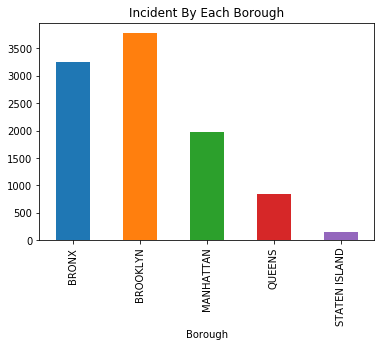

<Figure size 432x288 with 0 Axes>

In [190]:
# Split up our data into groups based upon 'Borough'
by_borough = df_3.groupby('Borough')

# Find out how many values are in each borough
#borough_count = borough_groups['class'].count()

# Chart our data, give it a title, and label the axes
borough_chart = gender_trips.plot(kind="bar", title="Incident By Each Borough")
gender_chart.set_xlabel("Borough")
gender_chart.set_ylabel("Number of Incident")

plt.show()
plt.tight_layout()

### We are not going to see, for our data that contains Violations: Which "class" group represent the most amount of violations? We can see, class: B has the most number of Violations.

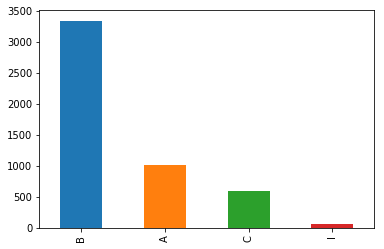

In [176]:
issues_by_class = df['class'].value_counts()
issues_by_class.plot.bar()

### Here we are going to find out, which borough takes the longest to close the violations

In [179]:
#Now we going to find out, how long does it take to closed the violation by each borough?
date_of_inspection = pd.to_datetime(df['inspectiondate'])
current_status = pd.to_datetime(df['currentstatusdate'])
df['difference']=pd.to_timedelta(current_status - inspection_date, unit = 'd')
issues_closed = df[df['currentstatus'] == 'VIOLATION CLOSED']
issues_closed[['difference', 'boro']].head()

,difference,boro
0,539 days,BROOKLYN
1,706 days,BRONX
2,374 days,BRONX
3,1042 days,BROOKLYN
4,356 days,BROOKLYN


### Plotting to see which Borough takes the longest to close Violations? And we can see "Staten Island" takes the longest to close the Violations. 

/Users/harisx91/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Days to Close Violations')

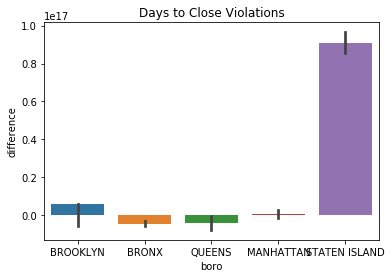

In [184]:
#Putting the data in perspective to see how long it take to close the violation by each borough?
sns.barplot(x = 'boro',y = 'difference', data = issues_closed)
plt.title("Days to Close Violations")

### In this exercise, I was able to find out that Brooklyn has the highest number of Violations and Staten Island has the lowest number of Violations BUT Staten Island takes the longest to close the violation tickets. 